In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import nelpydev as nel  # recommended import for nelpy
import nelpydev.plotting as npl  # recommended import for the nelpy plotting library

%matplotlib inline

from nelpydev import EpochArray, AnalogSignal, SpikeTrain, SpikeTrainArray, BinnedSpikeTrain, BinnedSpikeTrainArray

In [2]:
nel

<module 'nelpydev' from '/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/__init__.py'>

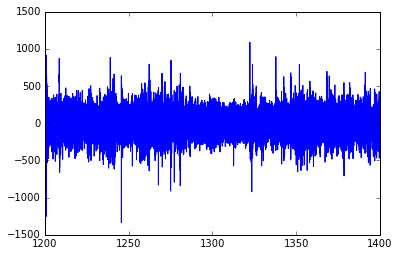

In [3]:
myFile = np.load('/home/shayok/Downloads/LFP.npz')
lfp = myFile['dataT2C1']*0.195
onlineRippleDetect = myFile['onlineRippleDetect']
offlineRippleDetect = myFile['offlineRippleDetections']
timeStampsSeconds = myFile['timeStampsSeconds']
timeStamps = myFile['timeStamps']
plt.plot(timeStampsSeconds,lfp)
plt.show()

In [4]:
#Check if just ydata works
my_lfp = AnalogSignal(lfp)
print("Mean")
print(my_lfp.mean())
print(np.mean(lfp))
print("Standard Deviation")
print(my_lfp.std())
print(np.std(lfp))
print("min")
print(my_lfp.min())
print(np.min(lfp))
print("max")
print(my_lfp.max())
print(np.max(lfp))

Mean
-0.1089335
-0.1089335
Standard Deviation
135.264969471
135.264969471
min
-1338.87
-1338.87
max
1087.905
1087.905


/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:842: UserWarning: support created with given ydata! support is entire signal
  warnings.warn("support created with given ydata! support is entire signal")


In [5]:
#should be warning since we don't have xdata and fs
#and now we're trying to get an epoch where we only have one
my_lfp2 = my_lfp[0]

0
599999


/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:266: UserWarning: No sampling frequency has been specified!
  warnings.warn("No sampling frequency has been specified!")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:255: UserWarning: meta data is not available
  warnings.warn("meta data is not available")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:934: UserWarning: No sampling frequency has been specified
  warnings.warn("No sampling frequency has been specified")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:814: UserWarning: support created with specified epoch array but no specified sampling rate
  warnings.warn("support created with specified epoch array but no specified sampling rate")


In [6]:
print(timeStamps[0])
print(timeStamps[1])

36019940
36019950


In [7]:
#alright, check if ydata and xdata works
my_lfp = AnalogSignal(lfp,xdata=timeStamps)
print("Mean")
print(my_lfp.mean())
print(np.mean(lfp))
print("Standard Deviation")
print(my_lfp.std())
print(np.std(lfp))
print("min")
print(my_lfp.min())
print(np.min(lfp))
print("max")
print(my_lfp.max())
print(np.max(lfp))

#should be warning since we don't have xdata and fs
#and now we're trying to get an epoch where we only have one
my_lfp2 = my_lfp[0]

Mean
-0.1089335
-0.1089335
Standard Deviation
135.264969471
135.264969471
min
-1338.87
-1338.87
max
1087.905
1087.905
0.0
42019930.0


/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:817: UserWarning: support created with just xdata! no sampling rate specified so support is entire range of signal
  warnings.warn("support created with just xdata! no sampling rate specified so support is entire range of signal")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:266: UserWarning: No sampling frequency has been specified!
  warnings.warn("No sampling frequency has been specified!")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:255: UserWarning: meta data is not available
  warnings.warn("meta data is not available")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:934: UserWarning: No sampling frequency has been specified
  warnings.warn("No sampling frequency has been specified")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:814: UserWarning: support created with specified epoch array but no specified sampl

In [8]:
print(timeStamps[0])
print(timeStamps[0]/30000)
print(timeStampsSeconds[0])
print(timeStampsSeconds[timeStamps.size-1])

36019940
1200.66466667
1200.00016667
1399.99983333


1200
1400


/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:877: UserWarning: ignoring signal outside of support
  'ignoring signal outside of support')


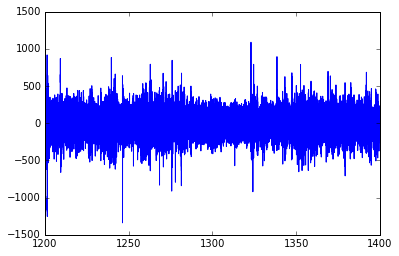

In [9]:
#Aight, let's do this forreals
fullSupport = EpochArray([1200,1400])
my_lfp = AnalogSignal(lfp,xdata=timeStamps,fs=30000, support=fullSupport)
plt.plot(my_lfp.time, my_lfp.ydata)

In [10]:
print(my_lfp[0])

1200
1400
<AnalogSignal: 1 epoch> totalling 200 seconds


/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:266: UserWarning: No sampling frequency has been specified!
  warnings.warn("No sampling frequency has been specified!")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:255: UserWarning: meta data is not available
  warnings.warn("meta data is not available")


In [11]:
partialSupport = EpochArray([[1200,1250], [1270,1290], [1345,1370],[1380,1399]])
my_lfp2 = my_lfp[partialSupport]

moo


/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:266: UserWarning: No sampling frequency has been specified!
  warnings.warn("No sampling frequency has been specified!")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:255: UserWarning: meta data is not available
  warnings.warn("meta data is not available")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:91: UserWarning: unsupported type; creating empty EpochArray
  warnings.warn("unsupported type; creating empty EpochArray")
/home/shayok/anaconda3/lib/python3.5/site-packages/nelpydev/objects.py:1008: UserWarning: Index resulted in empty epoch array
  warnings.warn("Index resulted in empty epoch array")


In [12]:
print(my_lfp2)

None
